In [22]:

import numpy as np
import matplotlib.pyplot as plt
import sys

import torch
from collections import OrderedDict
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time

np.random.seed(1234)


# Defining our problem

alpha = 0.1
length = 1 #mm
time = 1 #second
N_t  = 10000 # set using CFL limit
N_x = 50
N_y = 50

# Initialization 

dx = length / N_x
dy = length / N_y

dt = time/N_t

u_final = np.zeros((N_x,N_y,N_t))  


# initial temperature
u = np.zeros((N_x, N_y)) -1 # Plate is initially as 20 degres C

# # Boundary Conditions 

# u[0, :] = np.zeros((N_y)) -1 #Bottom BC
# u[-1, :] = np.zeros((N_y)) +1 # Top BC

# u[:, 0] = np.zeros((N_x)) -1 # Left BC
# u[:, -1] = np.zeros((N_x)) -1 # Right BC

# Boundary Conditions 

u[0, :] = np.zeros((N_y)) -1 #Left BC
u[-1, :] = np.zeros((N_y)) -1 # Right BC

u[:, 0] = np.zeros((N_x)) -1 # Bottom BC
u[:, -1] = np.zeros((N_x)) +1 # Top BC

t: 0.000 [s], Average temperature: -0.96 Celcius


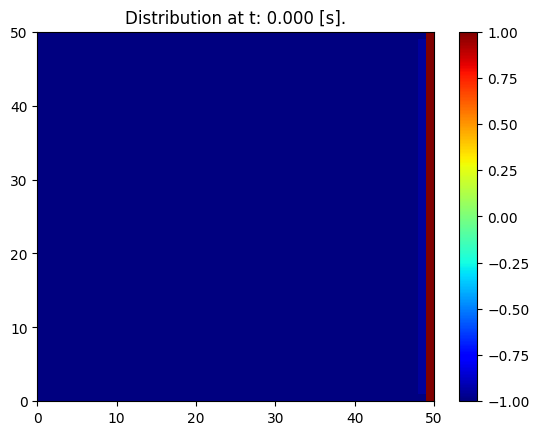

t: 0.000 [s], Average temperature: -0.96 Celcius
t: 0.000 [s], Average temperature: -0.96 Celcius
t: 0.000 [s], Average temperature: -0.96 Celcius
t: 0.001 [s], Average temperature: -0.96 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.001 [s], Average temperature: -0.95 Celcius
t: 0.002 [s], Average temperature: -0.95 Celcius
t: 0.002 [s], Average temperature: -0.95 Celcius
t: 0.002 [s], Average temperature: -0.95 Celcius
t: 0.002 [s], Average temperature: -0.95 Celcius
t: 0.002 [s], Average temperature: -0.95 Celcius
t: 0.002 [s], Average temperature: -0.94 Celcius
t: 0.002 [s], Average temperature: -0.94 Celcius
t: 0.002 [s], Averag

In [23]:
# Visualizing with a plot

fig, axis = plt.subplots()

pcm = axis.pcolormesh(u, cmap=plt.cm.jet)
plt.colorbar(pcm, ax=axis)

# Simulating

counter = 0

while counter <= time :

    w = u.copy()

    u_final[:,:,int(N_t*counter)] = u.copy()

    for i in range(1, N_x - 1):
        for j in range(1, N_y - 1):

            dd_ux = (w[i-1, j] - 2*w[i, j] + w[i+1, j])/dx**2
            dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j+1])/dy**2

            u[i, j] = dt * alpha * (dd_ux + dd_uy) + w[i, j]

            u_final[i-1,j-1,int(N_t*counter)] = u[i,j]

    counter += dt

    print("t: {:.3f} [s], Average temperature: {:.2f} Celcius".format(counter, np.average(u)))

    # Updating the plot

    pcm.set_array(u)
    axis.set_title("Distribution at t: {:.3f} [s].".format(counter))
    plt.pause(0.01)


plt.show()

np.save('u_final.npy', u_final)

In [24]:
loaded_u_final = np.load('u_final.npy')
loaded_u_final.shape


(50, 50, 10000)

In [25]:
loaded_u_final[:,:,0].max()

1.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


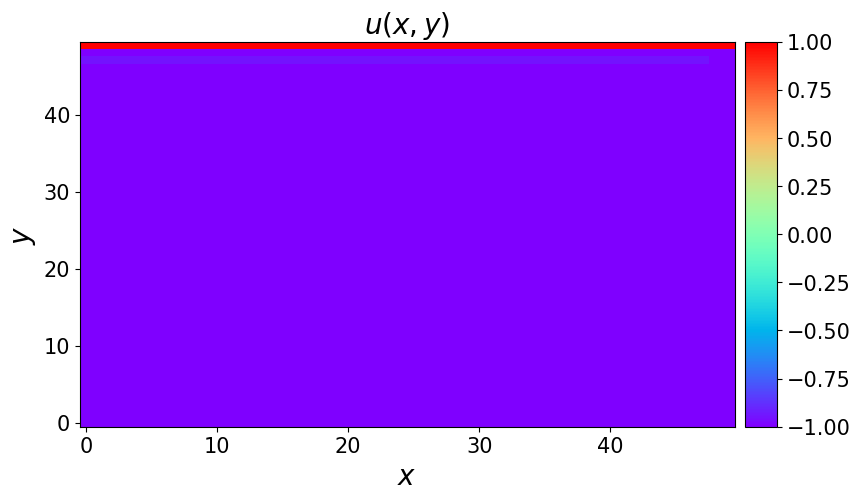

In [26]:

""" The aesthetic setting has changed. """

####### Row 0: u(t,x) ##################    

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)

h = ax.imshow(loaded_u_final[:,:,0].T, interpolation='nearest', cmap='rainbow', 
            #   extent=[x.min(), x.max(), y.min(), y.max()], 
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
cbar.ax.tick_params(labelsize=15) 


ax.set_xlabel('$x$', size=20)
ax.set_ylabel('$y$', size=20)
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.9, -0.05), 
    ncol=5, 
    frameon=False, 
    prop={'size': 15}
)
ax.set_title('$u(x,y)$', fontsize = 20) # font size doubled
ax.tick_params(labelsize=15)

plt.show()

In [27]:
loaded_u_final[:,-1,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


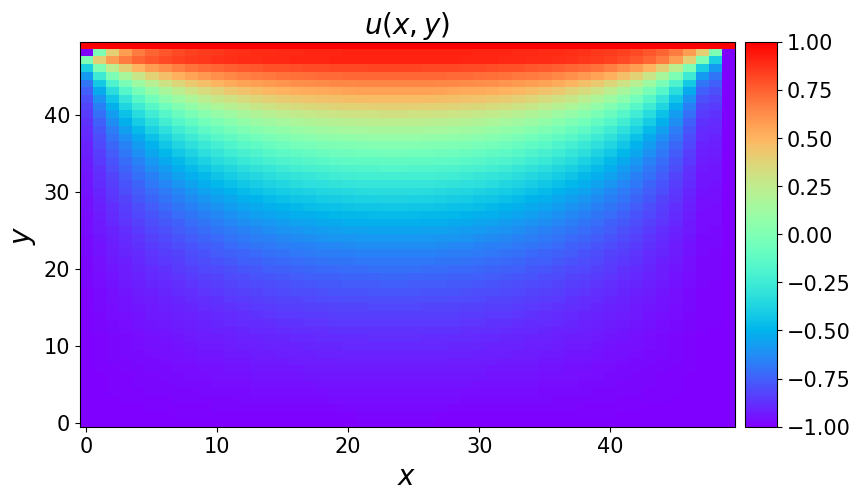

In [28]:

""" The aesthetic setting has changed. """

####### Row 0: u(t,x) ##################    

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111)

h = ax.imshow(loaded_u_final[:,:,-1].T, interpolation='nearest', cmap='rainbow', 
            #   extent=[x.min(), x.max(), y.min(), y.max()], 
              origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.10)
cbar = fig.colorbar(h, cax=cax)
cbar.ax.tick_params(labelsize=15) 


ax.set_xlabel('$x$', size=20)
ax.set_ylabel('$y$', size=20)
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.9, -0.05), 
    ncol=5, 
    frameon=False, 
    prop={'size': 15}
)
ax.set_title('$u(x,y)$', fontsize = 20) # font size doubled
ax.tick_params(labelsize=15)

plt.show()